In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib widget
from matplotlib.colors import ListedColormap


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### IMPORTING THE DATA (csv file named Churn.csv)

In [2]:
# type your code here
data_churn=pd.read_csv("https://raw.githubusercontent.com/shubhamsharma12393/telecom/main/Telecom%20Customer-Churn.csv")
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### DATA PREPROCESSING AND CLEANING

In [3]:
data_churn.shape

(7043, 21)

In [4]:
data_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 1. From the above info, there are 7043 rows/entries and 21 columns/features
### 2. The dataset is made up of 3 data types; float, integer and object.
### 3. Looking at the above dataset, there are 2 float(decimals), 2 integer(whole numbers) and 17 object (categorical) columns/features,
### 4. TotalCharges which is supposed to be a float feature is an object. Also Senior Citizen must be object instead of integer. So changig the data type respectively. 

In [5]:
data_churn['TotalCharges'] = pd.to_numeric(data_churn['TotalCharges'], errors= 'coerce')

In [6]:
data_churn['SeniorCitizen']= data_churn['SeniorCitizen'].astype('object')

In [7]:
data_churn.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
data_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
percentage_missing= data_churn.isnull().sum().sum()/len(data_churn)*100
percentage_missing

0.1561834445548772

### There are 11 missing entries in column TotalCharges. As number of missing values are 11 which account for 0.15%. So we can drop the rows. 

In [10]:
null_index= data_churn[data_churn['TotalCharges'].isnull()].index
data_churn.drop(null_index, inplace = True)

In [11]:
data_churn.shape

(7032, 21)

### ASSUMPTION: There are cerain columns which contain the value "No Internet Service" and "No Phone Service". No Internet Service or No Phone Service in other way can be assumed to to be an attribute of not availing the Services so it is converted into 'No'.

In [12]:
data_churn= data_churn.replace('No phone service', 'No')
data_churn= data_churn.replace('No internet service', 'No')

### EXPLORATORY DATA ANALYSIS

## CLASS COUNT OF CHURN

In [13]:
data_churn['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [14]:
data_churn['Churn'].value_counts()*100/len(data_churn['Churn'])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [15]:
data_churn['SeniorCitizen']= data_churn['SeniorCitizen'].astype(object)
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Text(0.5, 1.0, 'FIG.#1 Distribution of Churn and Non_churn')

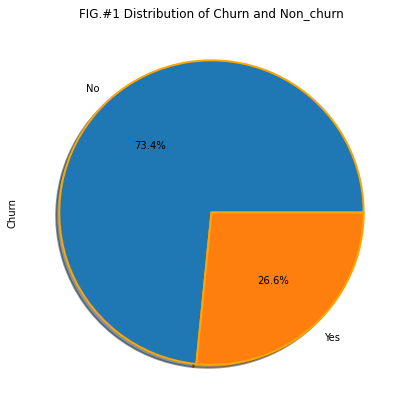

In [16]:
plt.figure(figsize=(10,7))
ax=data_churn['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("FIG.#1 Distribution of Churn and Non_churn")

In [17]:
# From FIG#1 we can say that data is in the ratio for YES:NO ~ 25:75

## CLASS COUNT OF GENDER

In [18]:
data_churn['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [19]:
data_churn.groupby('Churn')['gender'].value_counts()/len(data_churn['gender'])*100

Churn  gender
No     Male      37.244027
       Female    36.177474
Yes    Female    13.353242
       Male      13.225256
Name: gender, dtype: float64

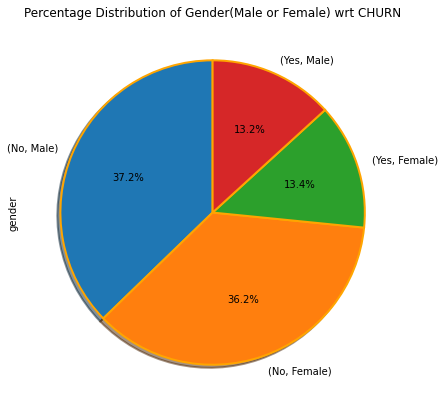

In [20]:
plt.figure(figsize=(10,7))

ax=data_churn.groupby('Churn')['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,
                                          wedgeprops   = { 'linewidth' : 2,'edgecolor' : "orange" },startangle=90
                                          )
ax.set_title("Percentage Distribution of Gender(Male or Female) wrt CHURN");

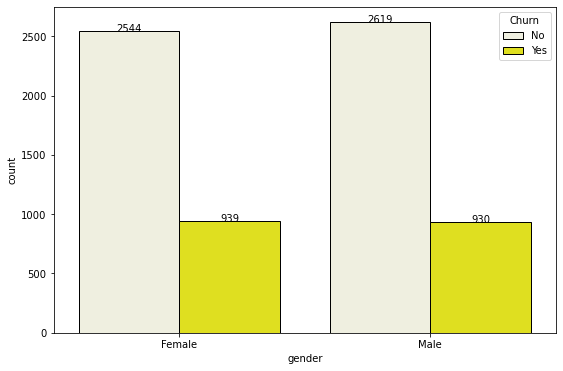

In [21]:
plt.figure(figsize=(9,6))

ax=sns.countplot(data=data_churn, x='gender', hue='Churn', color='Yellow', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [22]:
# the distribution of customers with respect to their gender is seen to be equal which is very good.
# The churn rate with respect to Gender is also same, from which we can conclude that churn rate is independent of the 
# gender.

# Class count for SeniorCitizen

In [23]:
data_churn['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [24]:
data_churn['SeniorCitizen'].value_counts()*100/len(data_churn['SeniorCitizen'])

0    83.759954
1    16.240046
Name: SeniorCitizen, dtype: float64

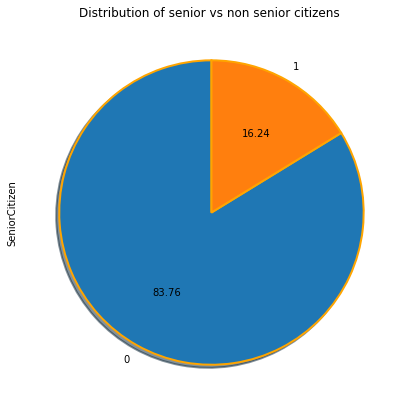

In [25]:
plt.figure(figsize=(10,7))

ax=data_churn['SeniorCitizen'].value_counts().plot(kind='pie',autopct='%.2f',shadow=True,
                                          wedgeprops   = { 'linewidth' : 2,'edgecolor' : "orange" },startangle=90)
ax.set_title("Distribution of senior vs non senior citizens ");

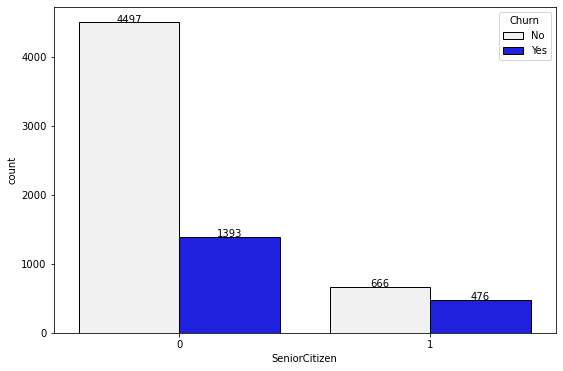

In [26]:
plt.figure(figsize=(9,6))

ax=sns.countplot(data=data_churn, x='SeniorCitizen', hue='Churn', color='Blue', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [27]:
# The age wise distribution shows us that the 4/5th of the customers pool is from young to middle age ie: economically active population.
# The company is losing a large portion(>3/4th) of its senior citizens customers which is alarming.

# Class count for Partner

In [28]:
data_churn['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [29]:
data_churn['Partner'].value_counts()*100/len(data_churn['Partner'])

No     51.749147
Yes    48.250853
Name: Partner, dtype: float64

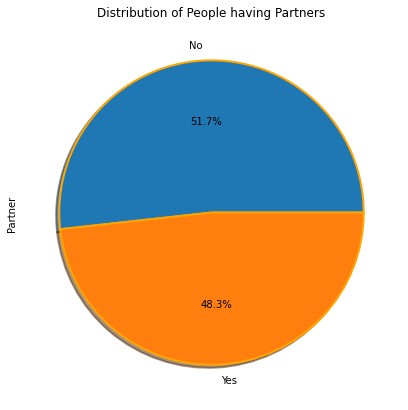

In [30]:
plt.figure(figsize=(10,7))
ax=data_churn['Partner'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People having Partners");

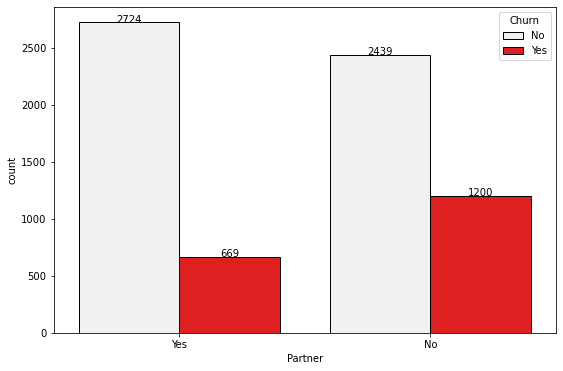

In [31]:
plt.figure(figsize=(9,6))

ax=sns.countplot(data=data_churn, x='Partner', hue='Churn', color='Red', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [32]:
# the distribution of people who are single and married almost similar.
# The churn rate for married people is in line with industry average. 
# But the churn rate of Single people is almost 50% which is bad.

# Class count for Dependants

In [33]:
data_churn['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [34]:
data_churn['Dependents'].value_counts()*100/len(data_churn['Partner'])

No     70.150739
Yes    29.849261
Name: Dependents, dtype: float64

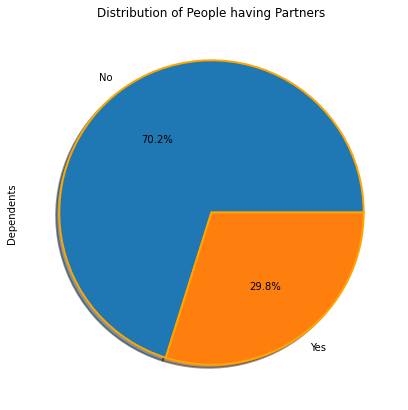

In [35]:
plt.figure(figsize=(10,7))
ax=data_churn['Dependents'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People having Partners");

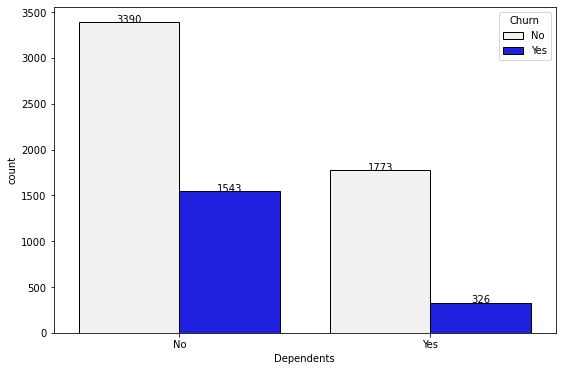

In [36]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data=data_churn, x = 'Dependents', hue = 'Churn', color = 'blue', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [37]:
# The distribution consistes of people with 70% of the customers with nil dependents.
#The churn rate is significantly high for people with nil dependents. 
# The churn rate is far less in with people having dependents.


# Class Count for PhoneService


In [38]:
data_churn['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [39]:
data_churn['PhoneService'].value_counts()*100/len(data_churn['PhoneService'])

Yes    90.32992
No      9.67008
Name: PhoneService, dtype: float64

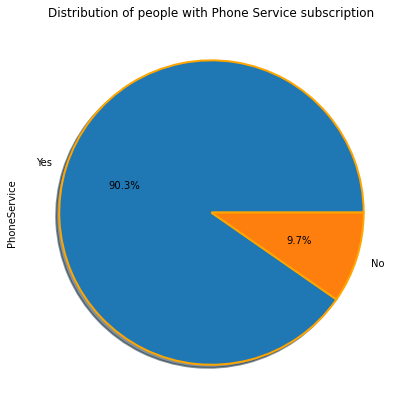

In [40]:
plt.figure(figsize=(10,7))
ax=data_churn['PhoneService'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of people with Phone Service subscription");

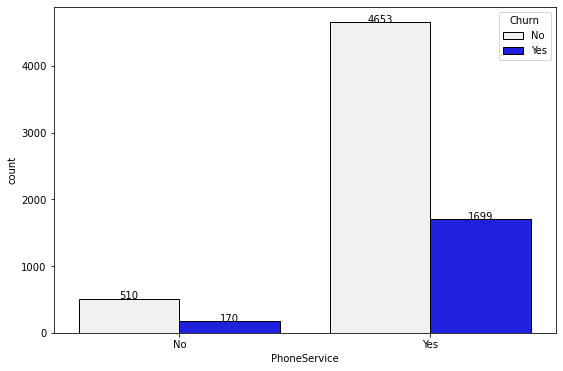

In [41]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data=data_churn, x = 'PhoneService', hue = 'Churn', color = 'blue', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [42]:
# From distribution 9 out of 10 people have Phone service enebaled.
# The churn rate proportionate with respect to average churn.

# Class count for MultipleLines

In [43]:
data_churn['MultipleLines'].value_counts()

No     4065
Yes    2967
Name: MultipleLines, dtype: int64

In [44]:
data_churn['MultipleLines'].value_counts()*100/len(data_churn['MultipleLines'])

No     57.807167
Yes    42.192833
Name: MultipleLines, dtype: float64

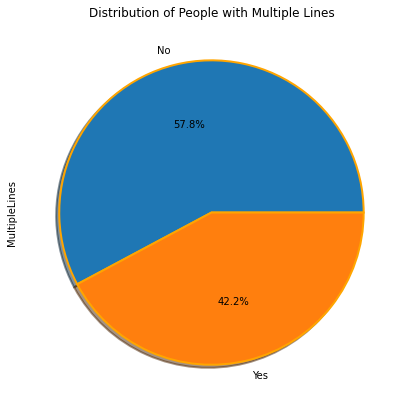

In [45]:
plt.figure(figsize=(10,7))
ax=data_churn['MultipleLines'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People with Multiple Lines");

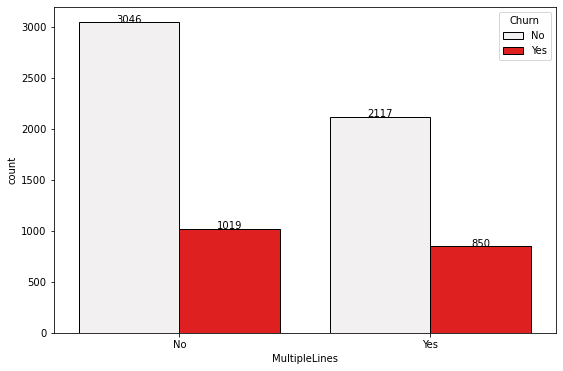

In [46]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'MultipleLines' , hue = 'Churn', color = 'Red', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [47]:
# Almost half the population are using multiple lines.
#The Churn rate is significantly higher ( almost similar to that of people without multiple lines) which is unhealthy.


# Class count for InternetService

In [48]:
data_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [49]:
data_churn['InternetService'].value_counts()*100/len(data_churn['InternetService'])

Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: InternetService, dtype: float64

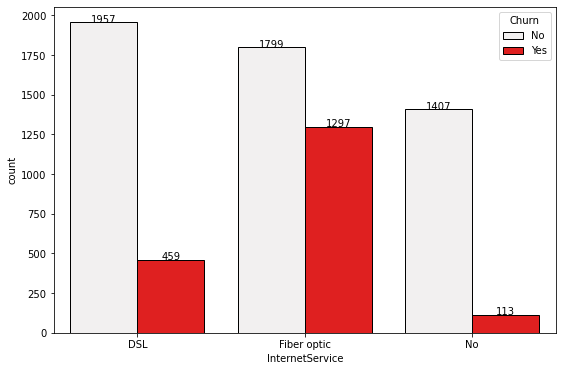

In [50]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'InternetService' , hue = 'Churn', color = 'Red', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()
plt.show()

# Class count for OnlineSecurity

In [51]:
data_churn['OnlineSecurity'].value_counts()

No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64

In [52]:
data_churn['OnlineSecurity'].value_counts()*100/len(data_churn['OnlineSecurity'])

No     71.345279
Yes    28.654721
Name: OnlineSecurity, dtype: float64

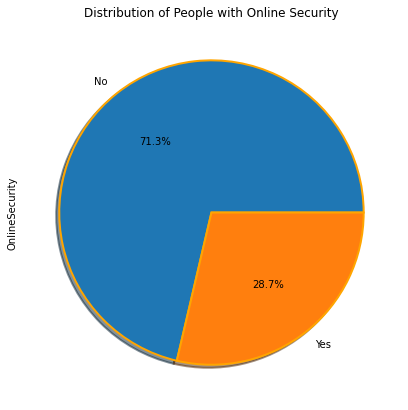

In [53]:
plt.figure(figsize=(10,7))
ax=data_churn['OnlineSecurity'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People with Online Security");

In [54]:
# The chart shows that half the customers are not having online security which is crtical in today's digital world.
# 

# Class count for OnlineBackup

In [55]:
data_churn['OnlineBackup'].value_counts()

No     4607
Yes    2425
Name: OnlineBackup, dtype: int64

In [56]:
data_churn['OnlineBackup'].value_counts()*100/len(data_churn['OnlineBackup'])

No     65.51479
Yes    34.48521
Name: OnlineBackup, dtype: float64

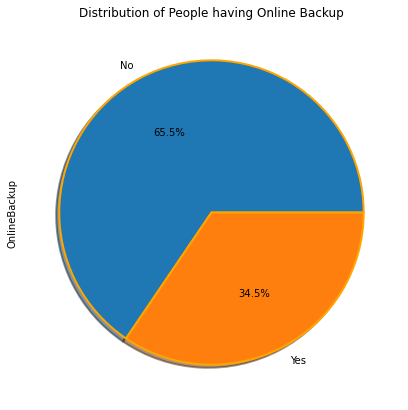

In [57]:
plt.figure(figsize=(10,7))
ax=data_churn['OnlineBackup'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People having Online Backup");

In [58]:
# The majority dont have or not availed online backup mode.

# Class count for DeviceProtection

In [59]:
data_churn['DeviceProtection'].value_counts()

No     4614
Yes    2418
Name: DeviceProtection, dtype: int64

In [60]:
data_churn['DeviceProtection'].value_counts()*100/len(data_churn['DeviceProtection'])

No     65.614334
Yes    34.385666
Name: DeviceProtection, dtype: float64

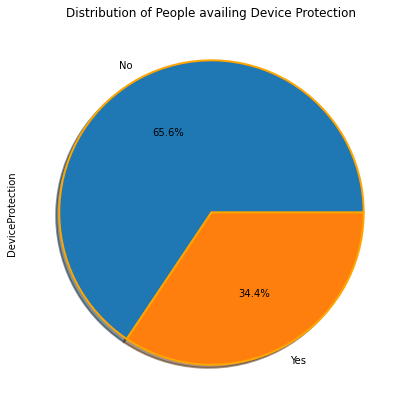

In [61]:
plt.figure(figsize=(10,7))
ax=data_churn['DeviceProtection'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People availing Device Protection");

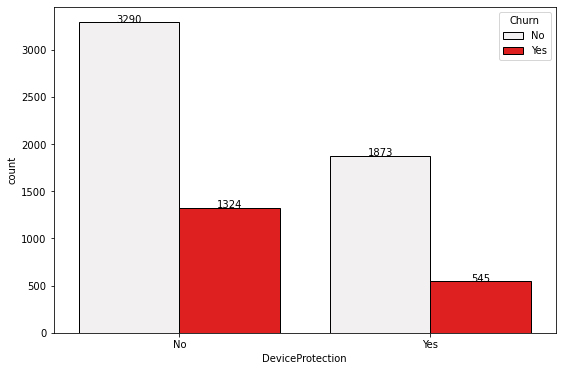

In [62]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'DeviceProtection' , hue = 'Churn', color = 'Red', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [63]:
# We can clearly draw a conclusion that churn rate is significantly proportional to Device protection feature.

# Class count for TechSupport

In [64]:
data_churn['TechSupport'].value_counts()

No     4992
Yes    2040
Name: TechSupport, dtype: int64

In [65]:
data_churn['TechSupport'].value_counts()*100/len(data_churn['TechSupport'])

No     70.989761
Yes    29.010239
Name: TechSupport, dtype: float64

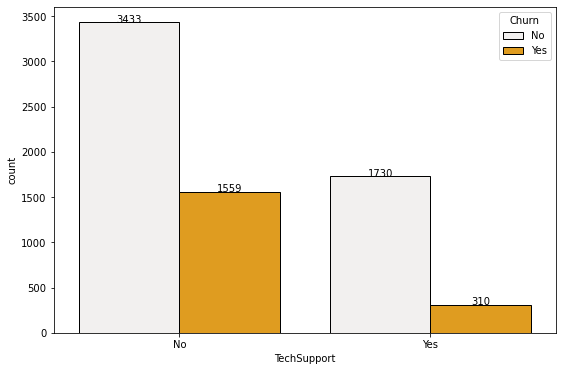

In [66]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'TechSupport' , hue = 'Churn', color = 'Orange', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [67]:
# The chart depicts that 50% of the customers do not have access to tech support which reults in unpleasant customer.
# Approximately 3/4th of the customers with no tech support are leaving the company.

# Class count for StreamingTV

In [68]:
data_churn['StreamingTV'].value_counts()

No     4329
Yes    2703
Name: StreamingTV, dtype: int64

In [69]:
data_churn['StreamingTV'].value_counts()*100/len(data_churn['StreamingTV'])

No     61.561433
Yes    38.438567
Name: StreamingTV, dtype: float64

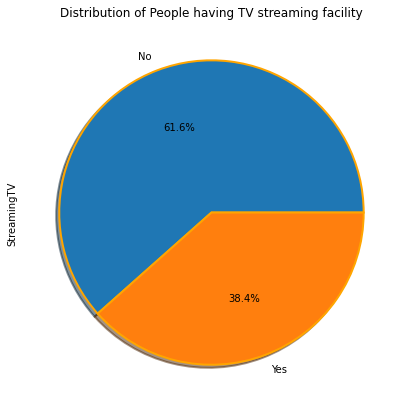

In [70]:
plt.figure(figsize=(10,7))
ax=data_churn['StreamingTV'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People having TV streaming facility");

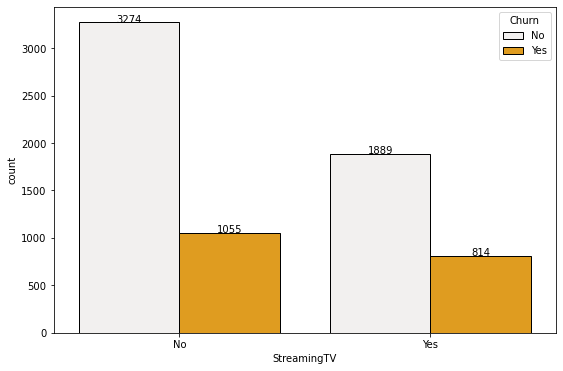

In [71]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'StreamingTV' , hue = 'Churn', color = 'Orange', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [72]:
# The churn rate is close to 50% with people having TV streaming which may or may not be due to streaming experience.

# Class count for StreamingMovies

In [73]:
data_churn['StreamingMovies'].value_counts()

No     4301
Yes    2731
Name: StreamingMovies, dtype: int64

In [74]:
data_churn['StreamingMovies'].value_counts()*100/len(data_churn['StreamingMovies'])

No     61.163254
Yes    38.836746
Name: StreamingMovies, dtype: float64

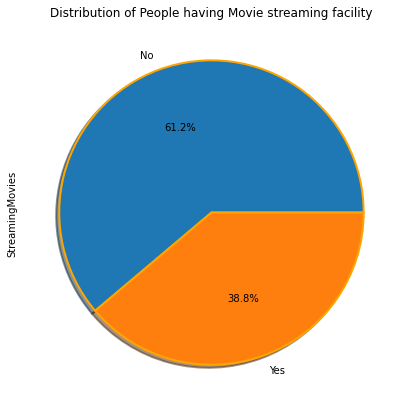

In [75]:
plt.figure(figsize=(10,7))
ax=data_churn['StreamingMovies'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People having Movie streaming facility");

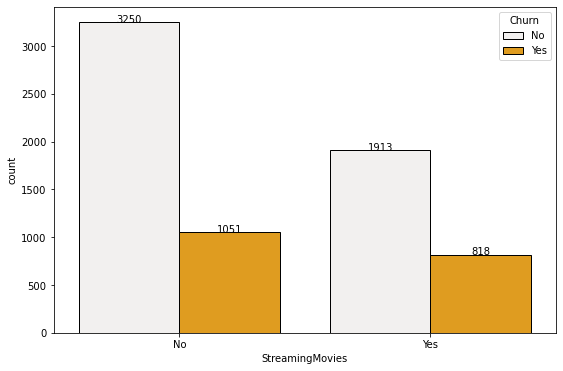

In [76]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'StreamingMovies' , hue = 'Churn', color = 'Orange', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

# Class count for Contract

In [77]:
data_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [78]:
data_churn['Contract'].value_counts()*100/len(data_churn['Contract'])

Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: Contract, dtype: float64

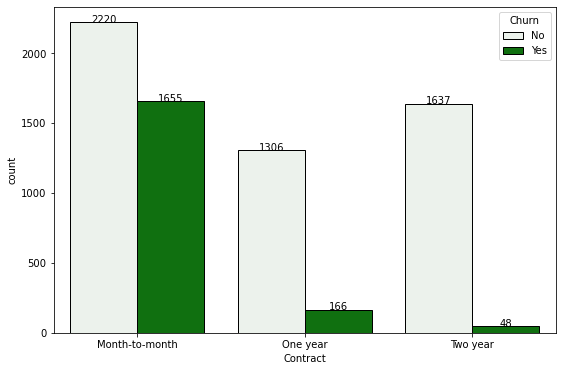

In [79]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'Contract' , hue = 'Churn', color = 'Green', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [80]:
# As people are purchasing year long contracts they are bound to stay with the company as opposed to monthly subscription.
# This may or may not be due to benefits enjoyed by them. As they can even leave after their contrct ends.

# Class count for PaperlessBilling

In [81]:
data_churn['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

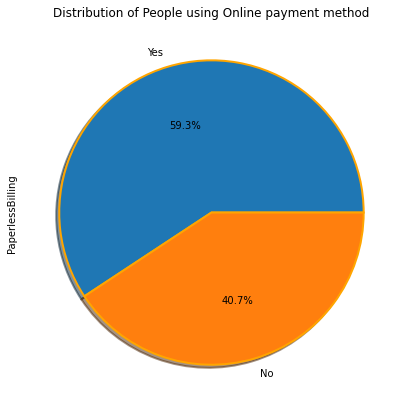

In [82]:
plt.figure(figsize=(10,7))
ax=data_churn['PaperlessBilling'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People using Online payment method");

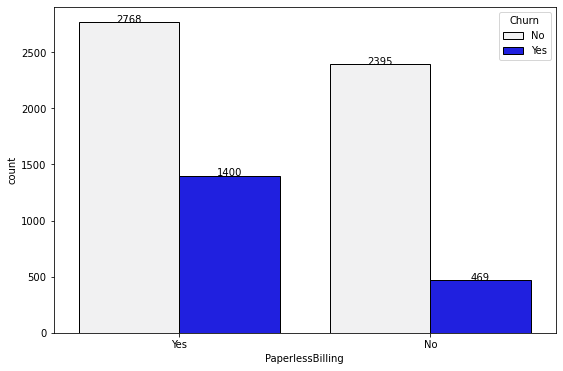

In [83]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data= data_churn, x= 'PaperlessBilling', hue= 'Churn', color = 'Blue', edgecolor = 'Black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [84]:
# This is added advantage to customers This does not mean that it directly affects the churn rate.
#al though we can see that people are facing discomfort with Online payments method.

# Class count for PaymentMethod

In [85]:
data_churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [86]:
data_churn['PaymentMethod'].value_counts()*100/len(data_churn['PaymentMethod'])

Electronic check             33.631968
Mailed check                 22.810011
Bank transfer (automatic)    21.928328
Credit card (automatic)      21.629693
Name: PaymentMethod, dtype: float64

<AxesSubplot:ylabel='PaymentMethod'>

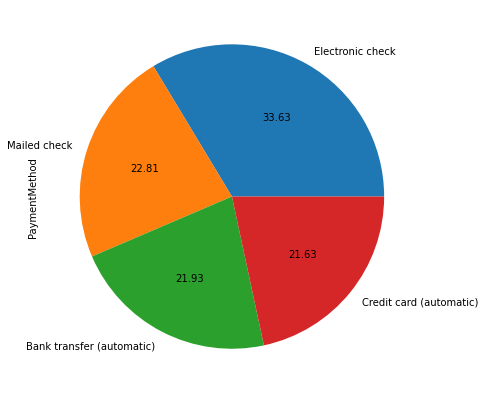

In [87]:
data_churn['PaymentMethod'].value_counts().plot(kind='pie' ,autopct='%.2f', figsize = (14,7) )

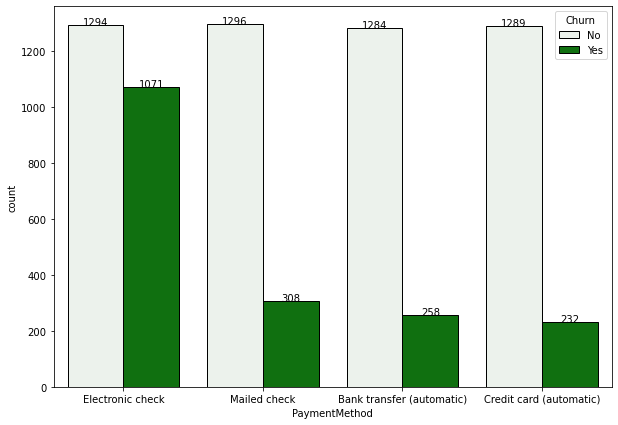

In [88]:
plt.figure(figsize=(10,7))
ax=sns.countplot(data = data_churn , x = 'PaymentMethod', hue = 'Churn',color = 'Green', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [89]:
# the payment methods usage are almost eqaully distributed.
#But the electronic check method shows much churn .

# Visualization

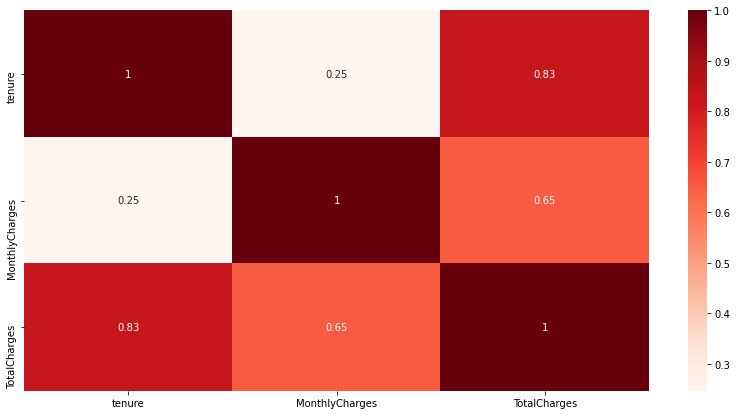

In [90]:
plt.figure(figsize=(14,7)) 
sns.heatmap(data_churn.corr(), annot=True ,cmap = 'Reds')
plt.show()

In [91]:
# From the above heatmap correlation :
# TotalCharges ~ Tenure is having a strong correlation
# MonthlyCharges ~ TotalCharges is having a significant correlation.

In [92]:
# Defining the Independent Variable and sepearting them into categorical and numerical data
# Dropping the gender variable as we have seen in the EDA that the gender variable is not a very significant in determining the churn of the customers 
X_num= data_churn.drop(['customerID', 'gender', 'Churn'], axis= 1).select_dtypes(include= [np.number])
X_cat= data_churn.drop(['customerID', 'gender', 'Churn'], axis= 1).select_dtypes(include= 'object')

In [93]:
# Converting the Output Varible into Binary Variable using lable Encoding
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
data_churn['Churn']= LE.fit_transform(data_churn['Churn'])

In [94]:
# defining the dependent variable 
y= data_churn['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
# sclaing the numerical variables
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(X_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X_num_scaled = pd.DataFrame(num_scaled, columns = X_num.columns, index= data_churn.index)
X_num_scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7038,-0.343137,0.664868,-0.129180
7039,1.612573,1.276493,2.241056
7040,-0.872808,-1.170004,-0.854514
7041,-1.158016,0.319168,-0.872095


In [97]:
# dummy variables for the categorical variable
dummy_var = pd.get_dummies(data = X_cat, drop_first = True)
dummy_var.columns

Index(['SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [98]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([X_num_scaled, dummy_var], axis = 1)

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   float64
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   SeniorCitizen_1                        7032 non-null   uint8  
 4   Partner_Yes                            7032 non-null   uint8  
 5   Dependents_Yes                         7032 non-null   uint8  
 6   PhoneService_Yes                       7032 non-null   uint8  
 7   MultipleLines_Yes                      7032 non-null   uint8  
 8   InternetService_Fiber optic            7032 non-null   uint8  
 9   InternetService_No                     7032 non-null   uint8  
 10  OnlineSecurity_Yes                     7032 non-null   uint8  
 11  Onli

In [100]:
# train test split
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

X= sm.add_constant(X)

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=10, test_size = 0.3)

In [101]:
y_train.value_counts()

0    3612
1    1310
Name: Churn, dtype: int64

In [102]:
y_train.value_counts()/len(y_train)*100

0    73.384803
1    26.615197
Name: Churn, dtype: float64

### THe data is IMBALANCED with  ratio ~ 73:27

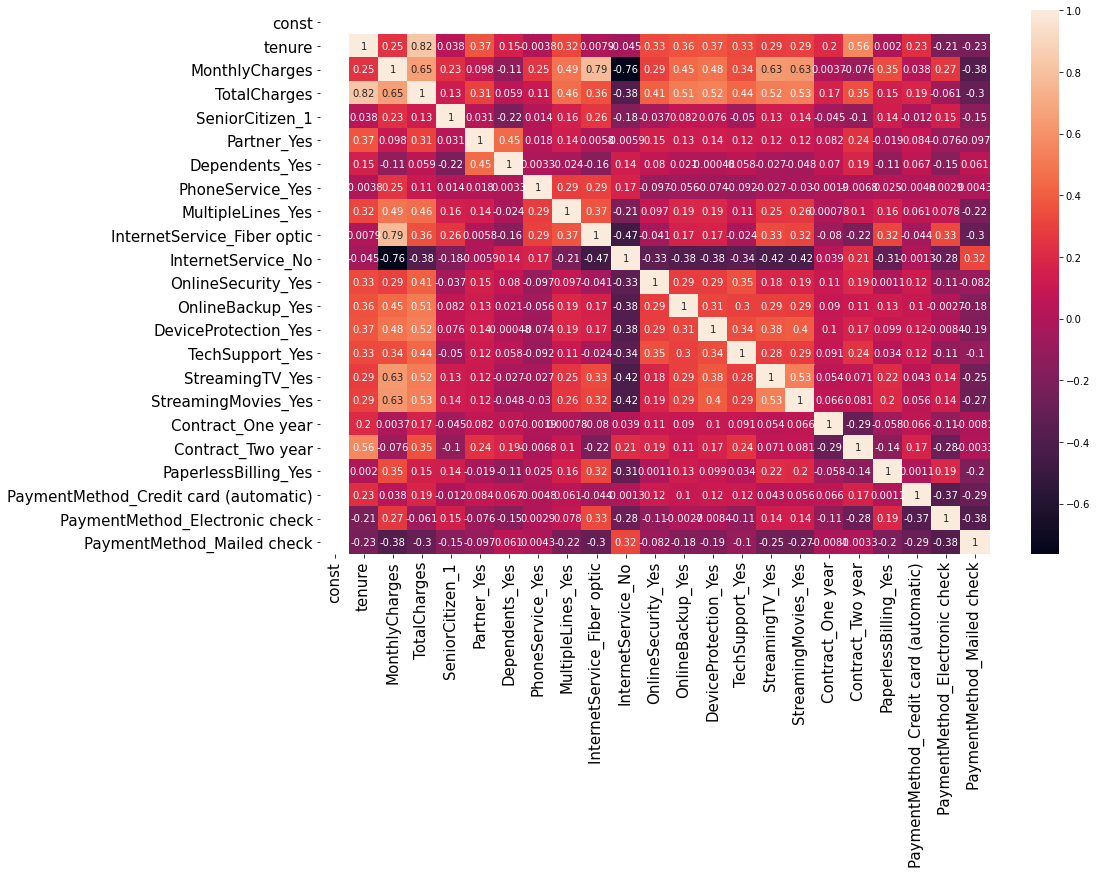

In [103]:
# set dimensions for the plot figure
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)

# plot the heat map
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(X_train.corr(), annot = True, annot_kws = {"size": 10})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

### Calculating the variation inflation factor for the numeric data types. 

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X[['tenure',"MonthlyCharges", "TotalCharges" ]].values, i) for i in range(X[['tenure',"MonthlyCharges", "TotalCharges" ]].shape[1])]
vif["features"] = X[['tenure',"MonthlyCharges", "TotalCharges" ]].columns
vif

,VIF Factor,features
0,5.844646,tenure
1,3.225293,MonthlyCharges
2,9.526697,TotalCharges


### while building the model we will drop Total Charge as the VIF_factor value for Total charge is highest and also near to 10. 

In [105]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [106]:
X_train= X_train.drop("TotalCharges", axis= 1)  # to reduce multicollinearity

### Building a Full-Model 

In [107]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.421875
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4900
Method:                           MLE   Df Model:                           21
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                  0.2719
Time:                        17:38:44   Log-Likelihood:                -2076.5
converged:                       True   LL-Null:                       -2851.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -4.4986      

In [108]:
# The LLR p-value is less than 0.05, implies that the model is significant.

In [109]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 4196.939008014379


### AIC value is used to compare different models. 

In [110]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,0.011125
tenure,0.443060
MonthlyCharges,0.083508
SeniorCitizen_1,1.265605
Partner_Yes,0.961763
Dependents_Yes,0.867669
PhoneService_Yes,3.293863
MultipleLines_Yes,1.916749
InternetService_Fiber optic,17.988383
InternetService_No,0.051040


## Prediction on the test set 

In [111]:
X_test= X_test.drop('TotalCharges',axis=1)

In [112]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

5401    0.021266
1681    0.006669
2076    0.148993
3359    0.130797
6629    0.032799
dtype: float64

In [113]:
# convert probabilities to 0 and 1 using 'if_else' because target value can take only one value either 0 or 1. 0.5 iis takenn as the cut-off
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

[0, 0, 0, 0, 0]

In [114]:
# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

### Plotting the confusion matrix

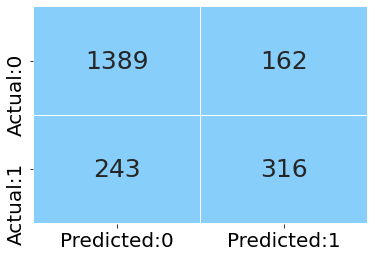

In [115]:
# pass the actual and predicted target values to the confusion_matrix()
cm_full = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm_full,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [116]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm_full[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm_full[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm_full[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm_full[1,0]

In [117]:
#Checking with the user defined function
update_score_card(logreg, 0.5)

In [118]:
score_card    # with 0.5 as the cutoff

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.5,0.730423,0.661088,0.565295,0.808057,0.483239,0.60945


In [119]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1551
           1       0.66      0.57      0.61       559

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



In [120]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.48323905794761457


## Plot the ROC curve.

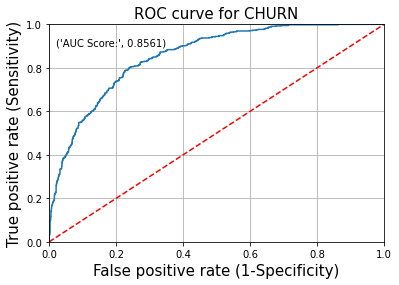

In [121]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for CHURN', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

### 1. AUC_Score being 0.730 is not a very good score for proper classification of the target variable.
### 2. As the data is imbalanced, so accuracy is not reliable metric be used to judge the model. 
### 3. Precision of 0.661 determines that 66% of the time the model is correctly predicting the true Positives wrt to            the total predicted positive values. This is not a very good score. 
### 4. Recall of 0.565 determines that 56% of the time the model is correcctly predicting the Positive response wrt              to the actual positive value present in the data. A score of 0.56 is slightly good as it is higher that 0.5.
### 5. The AUC score obtained from the graph is 0.85, which is a good score for proper classicification. 
### 6. The Kappa value came out to be 0.48 (<0.5), so we can say that there is no substantial agreement between Actial and Predicted values

###  we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.8572

### We need to identify the best cut-off value

## USING Youden's Index

In [122]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.799642,0.237911,0.315498,0.561731
1,0.801431,0.239845,0.313410,0.561586
2,0.787120,0.225661,0.325048,0.561459
3,0.803220,0.241779,0.311175,0.561441
4,0.788909,0.227595,0.322717,0.561314


In [123]:
# maximum Youden's Index is found as 0.556446 with cut-off value 0.315

In [124]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.315 else 1 for x in y_pred_prob]

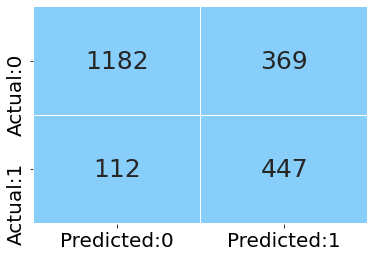

In [125]:
# pass the actual and predicted target values to the confusion_matrix()
cm_full_youden = confusion_matrix(y_test, y_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm_full_youden,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [126]:
#Checking with the user defined function
update_score_card(logreg, 0.33)

In [127]:
score_card

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.50,0.730423,0.661088,0.565295,0.808057,0.483239,0.609450
1,0.33,0.777547,0.556978,0.778175,0.777251,0.492540,0.649254


In [128]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1551
           1       0.55      0.80      0.65       559

    accuracy                           0.77      2110
   macro avg       0.73      0.78      0.74      2110
weighted avg       0.82      0.77      0.78      2110



In [129]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_youden)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.48972881332071694


As kappa is 0.4861, greater than 0.33(cut-off) so we can say that there is a substantial agreement between actual and predicted value 

### AUC_Score being 0.77 is not a very good score for proper classification of the target variable.
### As the data is imbalanced, so accuracy can be used to judge the model. We got an accuracy of 77.00 % here in full model. 
### Precision of 0.55 determines that 55% of the time the model is correctly predicting the true Positives wrt to the total predicted positive values. This is not a very good score. This has declined 
### Recall of 0.77 determines that 77% of the time the model is correcctly predicting the Positive response wrt to the actual positive value present in the data. A score of 0.77 is good score.
### 5. The Kappa value came out to be 0.49 (>0.31), so we can say that there is substantial agreement between Actial and Predicted values

# Recursive Feature Engineering is used for feature selection

In [130]:
from sklearn.feature_selection import RFE

In [131]:
# consider the independent variables (without the intercept term)
# as, X_train and X_test contains the intercept term
# use 'iloc' to select the variables wthout intercept term 
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]

# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg, n_features_to_select = 13)   # 13 is chosen after looking at the p value for features in the full model. 

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_rfe, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['tenure', 'SeniorCitizen_1', 'PhoneService_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check'],
      dtype='object')


In [132]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
# consider the variables obtained from RFE method and the intercept term
logreg_rfe = sm.Logit(y_train, X_train[['const','tenure', 'SeniorCitizen_1', 'PhoneService_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']]).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.423456
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4908
Method:                           MLE   Df Model:                           13
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                  0.2691
Time:                        17:38:45   Log-Likelihood:                -2084.2
converged:                       True   LL-Null:                       -2851.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2906      0.156     -8.295     

In [133]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg_rfe.aic)

AIC: 4196.496539787406


In [134]:
# let 'y_pred_prob_rfe' be the predicted values of y
y_pred_prob_rfe = logreg_rfe.predict(X_test[['const', 'tenure', 'SeniorCitizen_1', 'PhoneService_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

# print the y_pred_prob_rfe
y_pred_prob_rfe.head()

5401    0.021067
1681    0.005647
2076    0.138933
3359    0.128836
6629    0.029722
dtype: float64

In [135]:
y_pred_rfe = [ 0 if x < 0.50 else 1 for x in y_pred_prob_rfe]

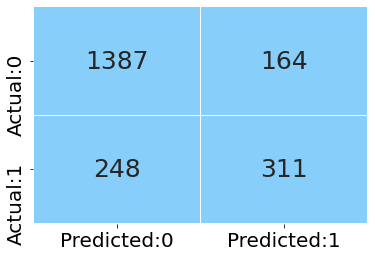

In [136]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm_rfe = confusion_matrix(y_test, y_pred_rfe)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm_rfe,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [137]:
# performance measures obtained by classification_report()
result = classification_report(y_test, y_pred_rfe)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1551
           1       0.65      0.56      0.60       559

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



In [138]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_rfe)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.4733596253687852


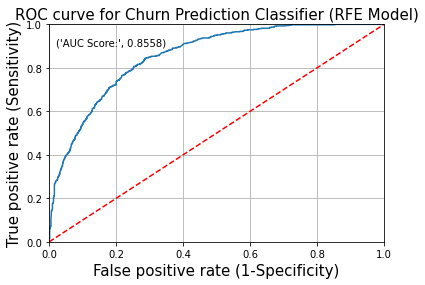

In [139]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfe)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Churn Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_rfe),4)))
                               
# plot the grid
plt.grid(True)

### AUC_Score obtained from ROC curve is 0.85 is good score for proper classification of the target variable.
### As the data is imbalanced, so accuracy is not reliable metric. 
### Precision of 0.64 determines that 64% of the time the model is correctly predicting the true Positives wrt to the total predicted positive values. This is not a very good score. This has declined 
### Recall of 0.56 determines that 56% of the time the model is correcctly predicting the Positive response wrt to the actual positive value present in the data. A score of 0.56 is not a good score. 
### Kappa value of 0.47(<0.5) suggest that there is quite a significant agreement between actual and predicted values. 

### Finding the best Cut-off value for the RFE model

In [140]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table_rfe = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table_rfe['Difference'] = youdens_table_rfe.TPR - youdens_table_rfe.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table_rfe= youdens_table_rfe.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table_rfe.head()

,TPR,FPR,Threshold,Difference
0,0.844365,0.286912,0.259102,0.557453
1,0.844365,0.288201,0.257299,0.556164
2,0.846154,0.290780,0.255627,0.555374
3,0.840787,0.285622,0.265222,0.555165
4,0.844365,0.290135,0.255736,0.554230


In [141]:
y_pred_rfe = [ 0 if x < 0.31 else 1 for x in y_pred_prob_rfe]

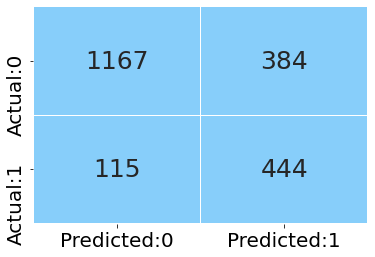

In [142]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm_rfe_youden = confusion_matrix(y_test, y_pred_rfe)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm_rfe_youden,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [143]:
# performance measures obtained by classification_report()
result = classification_report(y_test, y_pred_rfe)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1551
           1       0.54      0.79      0.64       559

    accuracy                           0.76      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.81      0.76      0.78      2110



In [144]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_rfe)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.4737828520250732


### AUC_Score obtained from ROC curve is 0.85 is good score for proper classification of the target variable.
### As the data is imbalanced, so accuracy is not reliable metric. 
### Precision of 0.54 determines that 54% of the time the model is correctly predicting the true Positives wrt to the total predicted positive values. This is not a very good score. This has declined 
### Recall of 0.79 determines that 79% of the time the model is correcctly predicting the Positive response wrt to the actual positive value present in the data. A score of 0.79 is a good score. 
### Kappa value of 0.47(>0.31) suggest that there is quite a significant agreement between actual and predicted values.

# The DATA is imbalanced. So, we need to balance the data for getting better insights after buliding the model. 

In [145]:
#importing libraries for the balancing of the data
from imblearn.over_sampling import ADASYN
ada= ADASYN(random_state= 130)
X_train_ada, y_train_ada= ada.fit_resample(X_train, y_train)

In [146]:
y_train_ada.value_counts()

1    3651
0    3612
Name: Churn, dtype: int64

# building a full model after data balancing

In [147]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg_bal = sm.Logit(y_train_ada, X_train_ada).fit()

# print the summary of the model
print(logreg_bal.summary())

Optimization terminated successfully.
         Current function value: 0.453506
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7263
Model:                          Logit   Df Residuals:                     7241
Method:                           MLE   Df Model:                           21
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                  0.3457
Time:                        17:38:46   Log-Likelihood:                -3293.8
converged:                       True   LL-Null:                       -5034.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.0327      

In [148]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg_bal.aic)

AIC: 6631.628584094901


In [149]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds_bal = pd.DataFrame(np.exp(logreg_bal.params), columns= ['Odds']) 

# print the dataframe
df_odds_bal

,Odds
const,1.844223e+08
tenure,5.985887e-01
MonthlyCharges,1.134798e+06
SeniorCitizen_1,7.982090e-01
Partner_Yes,8.900566e-01
Dependents_Yes,6.472532e-01
PhoneService_Yes,7.035676e-05
MultipleLines_Yes,1.093562e-01
InternetService_Fiber optic,2.018782e-05
InternetService_No,5.825980e+04


In [150]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob_bal = logreg_bal.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

5401    0.021266
1681    0.006669
2076    0.148993
3359    0.130797
6629    0.032799
dtype: float64

In [151]:
# convert probabilities to 0 and 1 using 'if_else' because target value can take only one value either 0 or 1. 0.5 iis takenn as the cut-off
y_pred_bal = [ 0 if x < 0.5 else 1 for x in y_pred_prob_bal]
y_pred_bal[0:5]

[0, 0, 0, 0, 0]

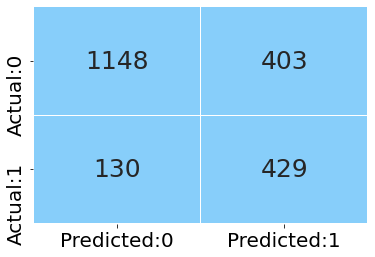

In [152]:
# pass the actual and predicted target values to the confusion_matrix()
cm_full_bal= confusion_matrix(y_test, y_pred_bal)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm_full_bal,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [153]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm_full_bal[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm_full_bal[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm_full_bal[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm_full_bal[1,0]

In [154]:
# calculate various performance measures
acc_table_bal = classification_report(y_test, y_pred_bal)

# print the table
print(acc_table_bal)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1551
           1       0.52      0.77      0.62       559

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.71      2110
weighted avg       0.80      0.75      0.76      2110



In [155]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_bal)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.43904083829384377


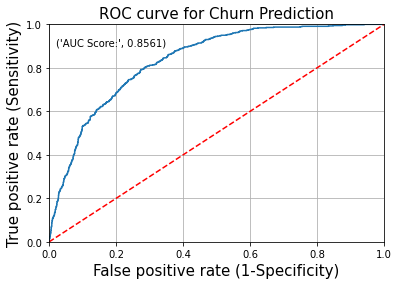

In [156]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_bal)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Churn Prediction', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

### 1. AUC_Score being 0.8561 is a good score for proper classification of the target variable.
### 2. As the data is balanced, so accuracy is a reliable metric be used to judge the model. Accuracy is 0.75. This is quite good score. 
### 3. Precision of 0.52 determines that 52% of the time the model is correctly predicting the true Positives wrt to            the total predicted positive values. This is not a very good score. 
### 4. Recall of 0.75 determines that 75% of the time the model is correcctly predicting the Positive response wrt              to the actual positive value present in the data. A score of 0.75 is slightly good as it is higher that 0.5
### 5. The Kappa value came out to be 0.439(<0.5), so we can say that there is no substantial agreement between Actial and Predicted values

### USing Youden's Index 

In [157]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.792487,0.273372,0.482093,0.519115
1,0.803220,0.286267,0.471213,0.516953
2,0.799642,0.283043,0.473751,0.516599
3,0.788909,0.272727,0.483916,0.516181
4,0.805009,0.288846,0.469834,0.516163


In [158]:
# the best cut_off is found to be 0.482

In [159]:
y_pred_bal_youden = [ 0 if x < 0.482 else 1 for x in y_pred_prob_bal]

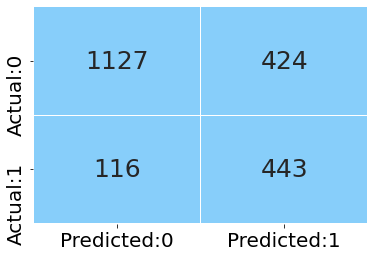

In [160]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm_bal_youden = confusion_matrix(y_test, y_pred_bal_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm_bal_youden,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [161]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_bal_youden)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.44134845167129666


In [162]:
# calculate various performance measures
acc_table_bal_youden = classification_report(y_test, y_pred_bal_youden)

# print the table
print(acc_table_bal_youden)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1551
           1       0.51      0.79      0.62       559

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.76      2110



### 1. AUC_Score being 0.8561 is good score for proper classification of the target variable.
### 2. As the data is balanced, so accuracy is a reliable metric be used to judge the model. Accuracy is 0.74. This is quite good score. 
### 3. Precision of 0.51 determines that 51% of the time the model is correctly predicting the true Positives wrt to            the total predicted positive values. This is not a very good score. 
### 4. Recall of 0.79 determines that 79% of the time the model is correcctly predicting the Positive response wrt              to the actual positive value present in the data. A score of 0.79 is slightly good as it is higher that 0.5
### 5. The Kappa value came out to be 0.441(<0.5), so we can say that there is no substantial agreement between Actial and Predicted values

### USing the Feature selection on the basis of the Forward Slection criteria. 

In [163]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [164]:
logreg = LogisticRegression()

# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here '12' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
logreg_bal_forward = sfs(estimator=logreg, k_features = 'best', forward=True,
                     verbose=2, scoring='precision')

# fit the forward selection on training data using fit()
sfs_forward = logreg_bal_forward.fit(X_train_ada.drop('const', axis= 1), y_train_ada)
t= sfs_forward.k_score_
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)
print('precision=',t)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished

[2022-04-24 17:38:47] Features: 1/21 -- score: 0.651401813904864[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished

[2022-04-24 17:38:48] Features: 2/21 -- score: 0.7045277393008486[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2022-04-24 17:38:49] Features: 3/21 -- score: 0.6870693730103509[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

Features selelected using forward selection are: 
('tenure', 'MonthlyCharges', 'SeniorCitizen_1', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check')
precision= 0.7654059942810015


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-04-24 17:38:59] Features: 21/21 -- score: 0.7499267382557802

In [165]:
logreg = LogisticRegression()

# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here '12' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=2' returns the number of features at the corresponding step and score
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step


logreg_bal_forward = sfs(estimator=logreg, k_features = 'best', forward=True,
                     verbose=2, scoring='accuracy')

# fit the forward selection on training data using fit()
sfs_forward = logreg_bal_forward.fit(X_train_ada.drop('const', axis= 1), y_train_ada)
t= sfs_forward.k_score_
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)
print('accuracy=',t)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.3s finished

[2022-04-24 17:39:00] Features: 1/21 -- score: 0.6467035998475653[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished

[2022-04-24 17:39:00] Features: 2/21 -- score: 0.7265588058524302[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2022-04-24 17:39:01] Features: 3/21 -- score: 0.7282095180674921[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Features selelected using forward selection are: 
('tenure', 'MonthlyCharges', 'SeniorCitizen_1', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check')
accuracy= 0.7669043244811248


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2022-04-24 17:39:10] Features: 20/21 -- score: 0.7662154296515806[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-04-24 17:39:10] Features: 21/21 -- score: 0.7633241948358009

In [166]:
# build the model on train data (X_train and y_train)  -- with features taken from the forward selection criteria
# use fit() to fit the logistic regression model
logreg_bal_forward = sm.Logit(y_train_ada, X_train_ada[['tenure', 'MonthlyCharges', 'SeniorCitizen_1', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check']]).fit()

# print the summary of the model
print(logreg_bal.summary())

Optimization terminated successfully.
         Current function value: 0.519000
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7263
Model:                          Logit   Df Residuals:                     7241
Method:                           MLE   Df Model:                           21
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                  0.3457
Time:                        17:39:10   Log-Likelihood:                -3293.8
converged:                       True   LL-Null:                       -5034.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.0327      

In [167]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob_bal_forward = logreg_bal.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

5401    0.021266
1681    0.006669
2076    0.148993
3359    0.130797
6629    0.032799
dtype: float64

In [168]:
y_pred_bal_forward= [1 if i>0.5 else 0 for i in y_pred_prob_bal_forward]

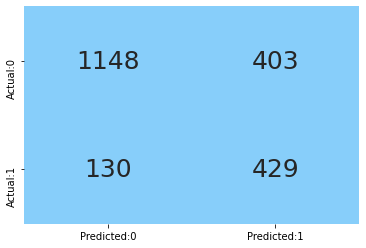

In [169]:
cm_bal_forward= confusion_matrix(y_test, y_pred_bal_forward)
cm_bal_forward= pd.DataFrame(cm_bal_forward, columns= ['Predicted:0', 'Predicted:1'], index= ['Actual:0', 'Actual:1'])
sns.heatmap(cm_bal_forward, annot = True, cbar= False, cmap= ListedColormap(['lightskyblue']), fmt= 'd', annot_kws={'size': 25})
plt.rcParams['figure.figsize']= [15,8]
plt.show()

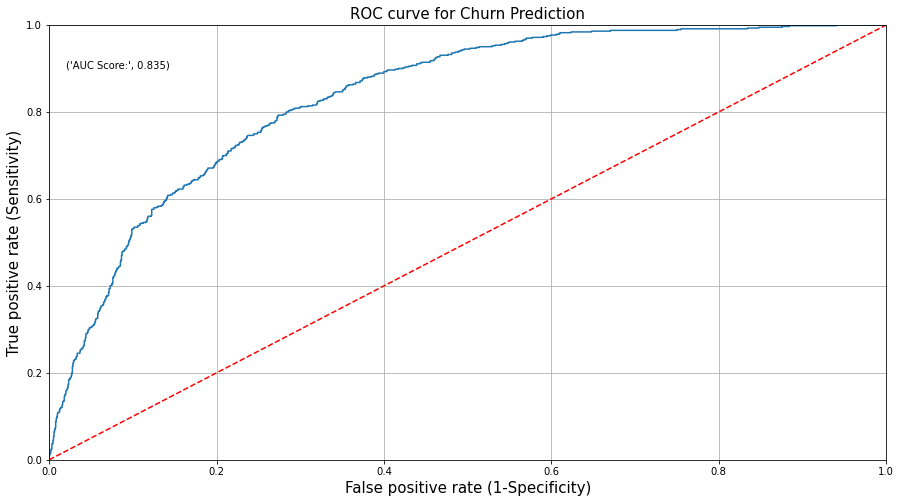

In [170]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_bal_forward)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Churn Prediction', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_bal_forward),4)))
                               
# plot the grid
plt.grid(True)

In [171]:
Youdens_table= pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'THRESHOLD': thresholds})
Youdens_table['Difference']= Youdens_table.TPR-Youdens_table.FPR

Youdens_table.sort_values('Difference', ascending= False)

,FPR,TPR,THRESHOLD,Difference
413,0.273372,0.792487,0.482093,0.519115
423,0.286267,0.803220,0.471213,0.516953
419,0.283043,0.799642,0.473751,0.516599
411,0.272727,0.788909,0.483916,0.516181
425,0.288846,0.805009,0.469834,0.516163
...,...,...,...,...
2,0.000000,0.008945,0.938187,0.008945
3,0.000645,0.008945,0.936978,0.008300
1,0.000000,0.001789,0.954222,0.001789
0,0.000000,0.000000,1.954222,0.000000


In [172]:
y_pred_prob_bal_forward_youden= [0 if i<0.48 else 1 for i in y_pred_prob_bal_forward]

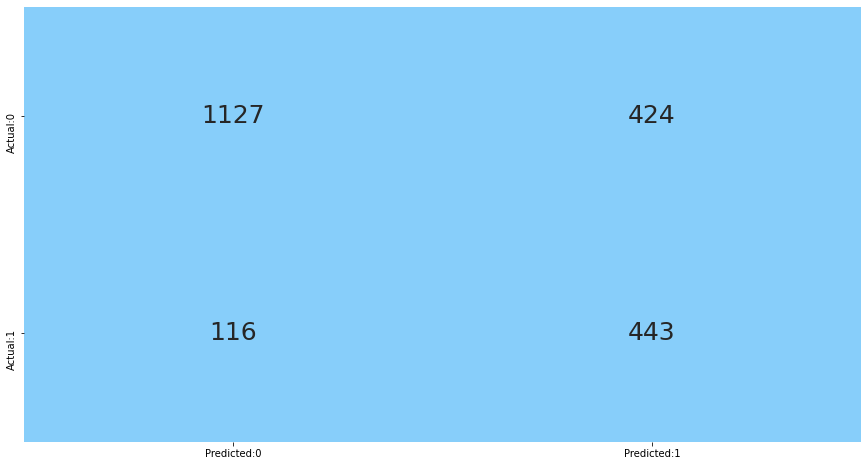

In [173]:
conf_matrix_forward_youden= confusion_matrix(y_test,y_pred_prob_bal_forward_youden )
conf_matrix_forward_youden= pd.DataFrame(conf_matrix_forward_youden,columns= ['Predicted:0', 'Predicted:1'], index= ['Actual:0', 'Actual:1'] )
sns.heatmap(conf_matrix_forward_youden, annot = True, cbar= False, cmap= ListedColormap(['lightskyblue']), fmt= 'd', annot_kws={'size': 25})
plt.rcParams['figure.figsize']= [15,8]
plt.show()

###############################################################################################################################

# Next we will try and fit other algorithms like 
1. Decision Tree
2. Random Forest 
3. XGBoost 

## DECISION TREE 

In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [175]:
# Defining a function for the automated calculations of the classification report and the required metrics
def Interpretation(model, X_train, X_test, y_train, y_test):
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    train_report= classification_report(y_train, y_pred_train)
    print("The Train data classification report")
    print (train_report)
    
    
    
    test_report= classification_report(y_test, y_pred_test)
    print("The Test data classification report") 
    print(test_report)

In [176]:
DTC= DecisionTreeClassifier(criterion='gini', random_state= 10)

decision_tree_gini = DTC.fit(X_train, y_train)

In [177]:
Interpretation(decision_tree_gini, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3612
           1       1.00      0.99      0.99      1310

    accuracy                           1.00      4922
   macro avg       1.00      0.99      1.00      4922
weighted avg       1.00      1.00      1.00      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1551
           1       0.49      0.52      0.50       559

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



In [178]:
DTC_entropy= DecisionTreeClassifier(criterion='entropy', random_state= 10)

decision_tree_entropy = DTC_entropy.fit(X_train, y_train)

In [179]:
Interpretation(decision_tree_entropy, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3612
           1       1.00      0.99      0.99      1310

    accuracy                           1.00      4922
   macro avg       1.00      0.99      1.00      4922
weighted avg       1.00      1.00      1.00      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1551
           1       0.48      0.51      0.50       559

    accuracy                           0.73      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.73      0.73      2110



### we can clearly see that the model is overfitting here so we wil try to set some parameters beforhand in order to prevent this issue 

In [180]:
DTC_optimised1= DecisionTreeClassifier(
                        criterion='gini',
                        splitter='best',
                        max_depth= 8,
                        min_samples_split=6,
                        min_samples_leaf=1,
                        max_features=None,
                        random_state=10)
decision_tree1 = DTC_optimised1.fit(X_train, y_train)

In [181]:
Interpretation(DTC_optimised1, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3612
           1       0.69      0.64      0.67      1310

    accuracy                           0.83      4922
   macro avg       0.78      0.77      0.78      4922
weighted avg       0.82      0.83      0.83      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1551
           1       0.62      0.59      0.60       559

    accuracy                           0.79      2110
   macro avg       0.73      0.73      0.73      2110
weighted avg       0.79      0.79      0.79      2110



In [182]:
DTC_optimised2= DecisionTreeClassifier(
                        criterion='gini',
                        splitter='best',
                        max_depth= 9,
                        min_samples_split=6,
                        min_samples_leaf=1,
                        max_features=None,
                        random_state=10)
decision_tree2 = DTC_optimised2.fit(X_train, y_train)

In [183]:
Interpretation(DTC_optimised2, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3612
           1       0.74      0.63      0.68      1310

    accuracy                           0.84      4922
   macro avg       0.81      0.77      0.79      4922
weighted avg       0.84      0.84      0.84      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1551
           1       0.59      0.54      0.56       559

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110



In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
# tuning the Hyperparameters using Gridsearch 
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
DTC = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 8
DTC_grid = GridSearchCV(estimator = DTC, 
                         param_grid = tuned_paramaters, 
                         cv = 8)

# fit the model on X_train and y_train using fit()
DTC_model= DTC_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', DTC_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [186]:
# building a model using the best parameters 

In [187]:
DTC_optimised_best= DecisionTreeClassifier(
                         criterion=  'gini', max_depth =4, max_features= 'sqrt', 
                        max_leaf_nodes= 7, min_samples_leaf=1, min_samples_split= 2, random_state= 10)
decision_tree2_best = DTC_optimised_best.fit(X_train, y_train)

In [188]:
Interpretation(decision_tree2_best, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3612
           1       0.67      0.44      0.53      1310

    accuracy                           0.79      4922
   macro avg       0.75      0.68      0.70      4922
weighted avg       0.78      0.79      0.78      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1551
           1       0.66      0.45      0.53       559

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



### as we can see that the accuracy is going down as we are decreasing max_depth. 
### with Gridsearc we have found that the model is Underfitting. 
### Recall score is also very low which is major requirement of tis type of classifiations 
### Also it is seen that we need to explore other algorithms for better results 

# Random Forest 

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
RFC= RandomForestClassifier(n_estimators= 6, random_state= 10)
RFC_model1= RFC.fit(X_train, y_train)

In [191]:
Interpretation(RFC_model1, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3612
           1       0.98      0.89      0.93      1310

    accuracy                           0.96      4922
   macro avg       0.97      0.94      0.95      4922
weighted avg       0.96      0.96      0.96      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1551
           1       0.57      0.44      0.50       559

    accuracy                           0.76      2110
   macro avg       0.69      0.66      0.67      2110
weighted avg       0.75      0.76      0.75      2110



In [192]:
# perform Gridsearch Here 

In [193]:
# Boosting techniques 

# adaboost 

In [194]:
from sklearn.ensemble import AdaBoostClassifier

In [195]:
adaboost= AdaBoostClassifier(n_estimators=40, random_state= 10)

adaboost_model= adaboost.fit(X_train, y_train)

In [196]:
Interpretation(adaboost_model, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3612
           1       0.67      0.53      0.59      1310

    accuracy                           0.81      4922
   macro avg       0.76      0.72      0.73      4922
weighted avg       0.80      0.81      0.80      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1551
           1       0.65      0.54      0.59       559

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [197]:
# Recall score is still not achieved to the required level 

In [198]:
from sklearn.ensemble import GradientBoostingClassifier

In [199]:
Gboost= GradientBoostingClassifier(n_estimators=40, random_state= 10)

Gboost_model= Gboost.fit(X_train, y_train)

In [200]:
Interpretation(Gboost_model, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      3612
           1       0.69      0.52      0.59      1310

    accuracy                           0.81      4922
   macro avg       0.76      0.72      0.73      4922
weighted avg       0.80      0.81      0.80      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1551
           1       0.65      0.53      0.59       559

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [201]:
# Using XGBoost method 

In [202]:
from xgboost import XGBClassifier

In [203]:
XGB= XGBClassifier(max_depth= 10, gamma= 1)
XGB_model= XGB.fit(X_train, y_train)

[17:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [204]:
Interpretation(XGB_model, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3612
           1       0.91      0.87      0.89      1310

    accuracy                           0.94      4922
   macro avg       0.93      0.92      0.93      4922
weighted avg       0.94      0.94      0.94      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1551
           1       0.59      0.54      0.56       559

    accuracy                           0.78      2110
   macro avg       0.71      0.70      0.71      2110
weighted avg       0.77      0.78      0.77      2110



In [205]:
# Hyperparameter tuning using Gridsearch 

tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
XGB = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
XGB_grid = GridSearchCV(estimator = XGB, param_grid = tuning_parameters, cv = 3, scoring = 'recall')

# fit the model on X_train and y_train using fit()
XGB_model= XGB_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', XGB_model.best_params_, '\n')

[17:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [206]:
# fit a model using the best parameters found in the above Gridsearch
XGB_best= XGBClassifier(gamma= 4, learning_rate= 0.3, max_depth= 6)
XGB_model_best= XGB_best.fit(X_train, y_train)

[17:54:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [207]:
Interpretation(XGB_model_best, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3612
           1       0.72      0.59      0.65      1310

    accuracy                           0.83      4922
   macro avg       0.79      0.75      0.77      4922
weighted avg       0.82      0.83      0.82      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1551
           1       0.64      0.57      0.61       559

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



# For balanced data

In [208]:
# Defining a function for the automated calculations of the classification report and the required metrics
def Interpretation(model, X_train, X_test, y_train, y_test):
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    train_report= classification_report(y_train, y_pred_train)
    print("The Train data classification report")
    print (train_report)
    
    
    
    test_report= classification_report(y_test, y_pred_test)
    print("The Test data classification report") 
    print(test_report)

# Decision Tree

In [209]:
DTC= DecisionTreeClassifier(criterion='gini', random_state= 10)

decision_tree_gini = DTC.fit(X_train_ada, y_train_ada)

In [210]:
Interpretation(decision_tree_gini, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3612
           1       1.00      1.00      1.00      3651

    accuracy                           1.00      7263
   macro avg       1.00      1.00      1.00      7263
weighted avg       1.00      1.00      1.00      7263

The Test data classification report
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1551
           1       0.45      0.57      0.50       559

    accuracy                           0.70      2110
   macro avg       0.64      0.66      0.65      2110
weighted avg       0.73      0.70      0.71      2110



### overfitting data on train result

In [211]:
DTC_entropy= DecisionTreeClassifier(criterion='entropy', random_state= 10)

decision_tree_entropy = DTC_entropy.fit(X_train_ada, y_train_ada)

In [212]:
Interpretation(decision_tree_entropy, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3612
           1       1.00      1.00      1.00      3651

    accuracy                           1.00      7263
   macro avg       1.00      1.00      1.00      7263
weighted avg       1.00      1.00      1.00      7263

The Test data classification report
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1551
           1       0.46      0.55      0.50       559

    accuracy                           0.71      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.71      0.72      2110



In [213]:
DTC_optimised3= DecisionTreeClassifier(
                        criterion='entropy',
                        splitter='best',
                        max_depth= 8,
                        min_samples_split=6,
                        min_samples_leaf=1,
                        max_features=None,
                        random_state=10)
decision_tree3 = DTC_optimised3.fit(X_train_ada, y_train_ada)

In [214]:
Interpretation(DTC_optimised3, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      3612
           1       0.74      0.89      0.81      3651

    accuracy                           0.79      7263
   macro avg       0.80      0.79      0.79      7263
weighted avg       0.80      0.79      0.79      7263

The Test data classification report
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1551
           1       0.46      0.84      0.60       559

    accuracy                           0.70      2110
   macro avg       0.69      0.75      0.68      2110
weighted avg       0.80      0.70      0.72      2110



In [215]:
DTC_optimised4= DecisionTreeClassifier(
                        criterion='gini',
                        splitter='best',
                        max_depth= 9,
                        min_samples_split=6,
                        min_samples_leaf=1,
                        max_features=None,
                        random_state=10)
decision_tree4 = DTC_optimised4.fit(X_train, y_train)

In [216]:
Interpretation(DTC_optimised4, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3612
           1       0.86      0.50      0.63      3651

    accuracy                           0.71      7263
   macro avg       0.76      0.71      0.70      7263
weighted avg       0.76      0.71      0.70      7263

The Test data classification report
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1551
           1       0.59      0.54      0.56       559

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110



In [217]:
# tuning the Hyperparameters using Gridsearch 
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
DTC = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 8
DTC_grid = GridSearchCV(estimator = DTC, 
                         param_grid = tuned_paramaters, 
                         cv = 8)

# fit the model on X_train and y_train using fit()
DTC_model= DTC_grid.fit(X_train_ada, y_train_ada)

# get the best parameters
print('Best parameters for decision tree classifier: ', DTC_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [218]:
DTC_optimised_best= DecisionTreeClassifier(
                         criterion= 'gini', max_depth= 3, max_features= 'sqrt', max_leaf_nodes= 8, min_samples_leaf= 1, min_samples_split= 2)
decision_tree2_best = DTC_optimised_best.fit(X_train_ada, y_train_ada)

In [219]:
Interpretation(decision_tree2_best, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.81      0.47      0.60      3612
           1       0.63      0.89      0.74      3651

    accuracy                           0.68      7263
   macro avg       0.72      0.68      0.67      7263
weighted avg       0.72      0.68      0.67      7263

The Test data classification report
              precision    recall  f1-score   support

           0       0.94      0.46      0.62      1551
           1       0.38      0.92      0.54       559

    accuracy                           0.58      2110
   macro avg       0.66      0.69      0.58      2110
weighted avg       0.79      0.58      0.60      2110



### as we can see that the accuracy is going down as we are decreasing max_depth. 
### with Gridsearc we have found that the model is Underfitting. 
### Recall score is also fine which is major requirement of this type of classifiations 
### Also it is seen that we need to explore other algorithms for better results 

# Random Forest

In [220]:
RFC= RandomForestClassifier(n_estimators= 6, random_state= 10)
RFC_model2= RFC.fit(X_train_ada, y_train_ada)

In [221]:
Interpretation(RFC_model2, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3612
           1       0.99      0.97      0.98      3651

    accuracy                           0.98      7263
   macro avg       0.98      0.98      0.98      7263
weighted avg       0.98      0.98      0.98      7263

The Test data classification report
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1551
           1       0.51      0.56      0.53       559

    accuracy                           0.74      2110
   macro avg       0.67      0.68      0.68      2110
weighted avg       0.75      0.74      0.74      2110



# Adaboost

In [222]:
adaboost= AdaBoostClassifier(n_estimators=40, random_state= 10)

adaboost_model= adaboost.fit(X_train_ada, y_train_ada)

In [223]:
Interpretation(adaboost_model, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.81      0.69      0.74      3612
           1       0.73      0.84      0.78      3651

    accuracy                           0.76      7263
   macro avg       0.77      0.76      0.76      7263
weighted avg       0.77      0.76      0.76      7263

The Test data classification report
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      1551
           1       0.49      0.86      0.62       559

    accuracy                           0.72      2110
   macro avg       0.71      0.77      0.70      2110
weighted avg       0.81      0.72      0.74      2110



### low recall and f1 score in test set

In [224]:
Gboost= GradientBoostingClassifier(n_estimators=40, random_state= 10)

Gboost_model= Gboost.fit(X_train_ada, y_train_ada)

In [225]:
Interpretation(Gboost_model, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.82      0.70      0.76      3612
           1       0.74      0.85      0.79      3651

    accuracy                           0.78      7263
   macro avg       0.78      0.78      0.78      7263
weighted avg       0.78      0.78      0.78      7263

The Test data classification report
              precision    recall  f1-score   support

           0       0.93      0.68      0.78      1551
           1       0.49      0.87      0.63       559

    accuracy                           0.73      2110
   macro avg       0.71      0.77      0.70      2110
weighted avg       0.82      0.73      0.74      2110



# XGboost

In [226]:
XGB= XGBClassifier(max_depth= 10, gamma= 1)
XGB_model= XGB.fit(X_train_ada, y_train_ada)

[18:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [227]:
Interpretation(XGB_model, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3612
           1       0.96      0.99      0.97      3651

    accuracy                           0.97      7263
   macro avg       0.97      0.97      0.97      7263
weighted avg       0.97      0.97      0.97      7263

The Test data classification report
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1551
           1       0.53      0.65      0.59       559

    accuracy                           0.75      2110
   macro avg       0.70      0.72      0.71      2110
weighted avg       0.78      0.75      0.76      2110



In [228]:

tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
XGB = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
XGB_grid = GridSearchCV(estimator = XGB, param_grid = tuning_parameters, cv = 3, scoring = 'recall')

# fit the model on X_train and y_train using fit()
XGB_model= XGB_grid.fit(X_train_ada, y_train_ada)

# get the best parameters
print('Best parameters for XGBoost classifier: ', XGB_model.best_params_, '\n')

[18:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [229]:
XGB_best= XGBClassifier(gamma= 0, learning_rate= 0.1, max_depth= 9)
XGB_model_best= XGB_best.fit(X_train_ada, y_train_ada)

[18:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [230]:
Interpretation(XGB_model_best, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3612
           1       0.91      0.98      0.94      3651

    accuracy                           0.94      7263
   macro avg       0.95      0.94      0.94      7263
weighted avg       0.95      0.94      0.94      7263

The Test data classification report
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1551
           1       0.53      0.74      0.62       559

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.76      0.77      2110



In [ ]:
from lightgbm import LGBMClassifier
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

In [231]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X_train_ada,y_train_ada)
print(model.feature_importances_)

[0.         0.19586376 0.18342457 0.02462838 0.0340757  0.03131241
 0.0112436  0.02895264 0.03760547 0.03116525 0.03933257 0.02962003
 0.0280465  0.03622882 0.02481707 0.02838211 0.05121494 0.07513126
 0.03400594 0.02645342 0.03042244 0.01807311]


<AxesSubplot:>

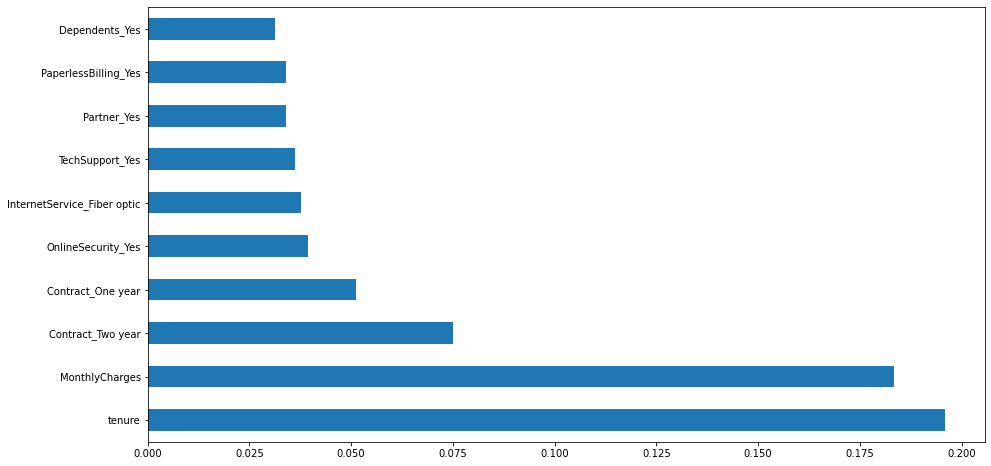

In [232]:
feat_imp=pd.Series(model.feature_importances_,index=X_train_ada.columns)
feat_imp.nlargest(10).plot(kind='barh')

# Naive bayes

## For imbalanced dataset


In [238]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy(in %): 0.752132701421801


In [241]:
Interpretation(gnb, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      3612
           1       0.49      0.81      0.61      1310

    accuracy                           0.72      4922
   macro avg       0.70      0.75      0.70      4922
weighted avg       0.80      0.72      0.74      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1551
           1       0.48      0.83      0.61       559

    accuracy                           0.72      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.80      0.72      0.73      2110



## For balannced dataset

In [239]:
gnb = GaussianNB()
gnb.fit(X_train_ada, y_train_ada)
 
#making predictions on the testing set
y_pred = gnb.predict(X_test)
 
#comparing actual response values (y_test) with predicted response values (y_pred)

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy(in %): 0.7180094786729858


In [240]:
Interpretation(gnb, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      3612
           1       0.72      0.78      0.75      3651

    accuracy                           0.73      7263
   macro avg       0.74      0.73      0.73      7263
weighted avg       0.74      0.73      0.73      7263

The Test data classification report
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1551
           1       0.48      0.83      0.61       559

    accuracy                           0.72      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.80      0.72      0.73      2110



## for imbalance dataset

In [246]:
from lightgbm import LGBMClassifier
lgbmmodel = LGBMClassifier()
lgbmmodel.fit(X_train, y_train)
Interpretation(lgbmmodel, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      3612
           1       0.80      0.69      0.74      1310

    accuracy                           0.87      4922
   macro avg       0.85      0.82      0.83      4922
weighted avg       0.87      0.87      0.87      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1551
           1       0.65      0.60      0.62       559

    accuracy                           0.81      2110
   macro avg       0.75      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110



## for balance dataset

In [245]:
from lightgbm import LGBMClassifier
lgbmmodel = LGBMClassifier()
lgbmmodel.fit(X_train_ada, y_train_ada)
Interpretation(lgbmmodel, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      3612
           1       0.85      0.94      0.89      3651

    accuracy                           0.89      7263
   macro avg       0.89      0.89      0.88      7263
weighted avg       0.89      0.89      0.88      7263

The Test data classification report
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1551
           1       0.51      0.75      0.61       559

    accuracy                           0.75      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.79      0.75      0.76      2110



## SVM

In [247]:
#SVC for imbalanced data

from sklearn.svm import SVC

sv = SVC()
sv_model = sv.fit(X_train, y_train)
y_pred_svm_train = sv_model.predict(X_train)
y_pred_svm_test = sv_model.predict(X_test)
train_report_svm = classification_report(y_train,y_pred_svm_train)
print(train_report_svm)
train_report_svm = classification_report(y_train,y_pred_svm_train)
print(train_report_svm)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3612
           1       0.71      0.50      0.59      1310

    accuracy                           0.81      4922
   macro avg       0.77      0.71      0.73      4922
weighted avg       0.80      0.81      0.80      4922

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3612
           1       0.71      0.50      0.59      1310

    accuracy                           0.81      4922
   macro avg       0.77      0.71      0.73      4922
weighted avg       0.80      0.81      0.80      4922



In [248]:
#SVC for balanced data


sv_ada = sv.fit(X_train_ada,y_train_ada)
y_pred_svm_ada_train = sv_ada.predict(X_train_ada)
y_pred_svm_ada_test = sv_ada.predict(X_test)

train_report_svm_ada = classification_report(y_train_ada,y_pred_svm_ada_train)
print(train_report_svm_ada)
test_report_svm_ada = classification_report(y_test,y_pred_svm_ada_test)
print(test_report_svm_ada)

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      3612
           1       0.76      0.91      0.83      3651

    accuracy                           0.81      7263
   macro avg       0.82      0.81      0.81      7263
weighted avg       0.82      0.81      0.81      7263

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1551
           1       0.48      0.84      0.61       559

    accuracy                           0.72      2110
   macro avg       0.70      0.76      0.69      2110
weighted avg       0.80      0.72      0.73      2110

